#### A cluster refers to a collection of data points aggregated together because of certain similarities

#### the k-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible

In [1]:
# import all the libraries you will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


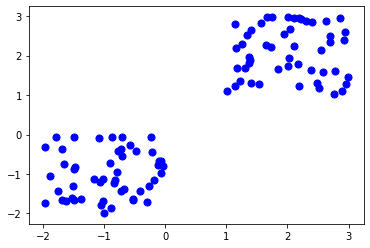

In [3]:
## generating some random data in two dimensional space
X=-2*np.random.rand(100,2)

X1=1+2*np.random.rand(50,2)
X[50:100,:]=X1

#plot the graph
plt.scatter(X[:,0],X[:,1],s=50,c='b')

plt.show()

In [4]:
X.shape

(100, 2)

In [5]:
#we'll use some of the available functions in the scikit-learn library to process 
#the randomly generated dat

from sklearn.cluster import KMeans
Kmean=KMeans(n_clusters=2)

#Fit it on the training data
Kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
#Finding the centroids

Kmean.cluster_centers_

array([[ 2.01581675,  2.08678414],
       [-0.94912019, -1.00298434]])

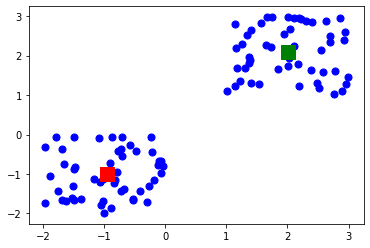

In [10]:
plt.scatter(X[:,0],X[:,1],s=50,c='b')
plt.scatter(2.01581675,2.08678414,s=200,c='g',marker='s')
plt.scatter(-0.94912019, -1.00298434,s=200,c='r',marker='s')

In [11]:
Kmean.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
#For example,let's use the code below for predicting the cluster of a data point

sample_test=np.array([-3.0,-3.0])

second_test=sample_test.reshape(1,-1)

Kmean.predict(second_test)

array([1])

## Implementing k-means from scratch on loan prediction dataset

In [14]:
data=pd.read_csv('clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


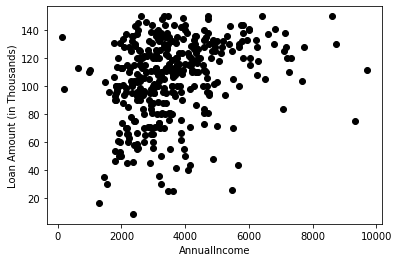

In [15]:
# we will be taking only two variables from the data
# LoanAmount and ApplicantIncome

X=data[['LoanAmount','ApplicantIncome']]
#Visualise data points
plt.scatter(X['ApplicantIncome'],X['LoanAmount'],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (in Thousands)')
plt.show()

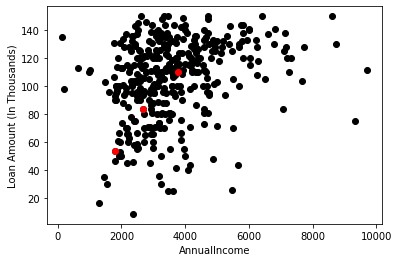

In [17]:
# 1. choose number of clusters
# 2. select random points

#number of clusters
K=3

Centroids=(X.sample(n=K))
plt.scatter(X['ApplicantIncome'],X['LoanAmount'],c='black')
plt.scatter(Centroids['ApplicantIncome'],Centroids['LoanAmount'],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [32]:
#3.  Assign all the points to the closest cluster centroid
#4. Recompute centroids of newly formed clusters
#5. Repeat step 3 and 4

diff=1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c['ApplicantIncome']-row_d['ApplicantIncome'])**2
            d2=(row_c['LoanAmount']-row_d['LoanAmount'])
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1
        
    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            f=i+1
            if row[f] < min_dist:
                min_dist=row[f]
                pos=i+1
        C.append(pos)
    X['Cluster']=C    
    Centroids_new=X.groupby(['Cluster']).mean()[['LoanAmount','ApplicantIncome']] 
    if j==0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]    

C:\Users\AYERHAN MSUGHTER\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()
C:\Users\AYERHAN MSUGHTER\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\AYERHAN MSUGHTER\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


621.4167825791267
594.8703389013556
495.4530962148649
411.5082319856306
214.97705293301496
216.13679395380288
291.606746212626
258.90753757049157
241.2093187786661
178.66459038974455
106.35771350307328
52.84741626127729
98.54724443834282
90.64953219227577
18.274686272279013
-0.4336795986145887
0.0


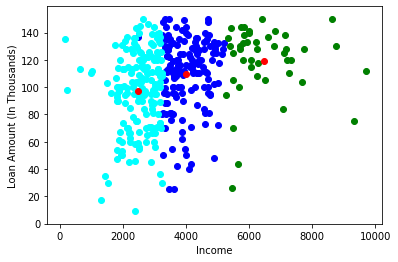

In [34]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X['Cluster']==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [36]:
for k in range(K):
    data=X[X['Cluster']==k+1]
    print(data)

     LoanAmount  ApplicantIncome           1            2            3  \
0         128.0             4583  581.606859  1901.065791  2097.582591   
9         125.0             4950  948.614546  1534.066197  2464.584286   
10        100.0             3596  405.389250  2888.071455  1110.588712   
11         76.0             3510  491.411589  2974.075396  1024.600325   
12        133.0             4887  885.609454  1597.063770  2401.582473   
..          ...              ...         ...          ...          ...   
370        94.0             4750  748.633088  1734.075364  2264.590636   
373       142.0             3859  142.263677  2625.063784  1373.573648   
374       110.0             3833  168.376294  2651.069862  1347.585208   
379        40.0             4106  104.954936  2378.084773  1620.607593   
380       133.0             4583  581.602561  1901.064476  2097.581399   

     Cluster  
0          1  
9          1  
10         1  
11         1  
12         1  
..       ...  
370   